In [1]:
import tangos as db
import numpy as np
import matplotlib.pyplot as plt

In [2]:
db.all_simulations()

[<Simulation("Tempest.9f11c.RD")>]

In [3]:
sim = db.get_simulation('Tempest.9f11c.RD')

In [4]:
sim[30]

<TimeStep 'Tempest.9f11c.RD/RD0042/RD0042' z=0.00 t=13.76 Gyr>

In [5]:
sim[30][1].keys()

['consistent_trees_id',
 'Mvir',
 'Mtot',
 'M200c',
 'Rvir',
 'X',
 'Y',
 'Z',
 'Spin_DM_B',
 'X_cu',
 'Y_cu',
 'Z_cu',
 'Center',
 'Center_cu',
 'M_gas',
 'M_coldgas',
 'M_star',
 'ContamFrac',
 'VX',
 'VY',
 'VZ',
 'consistent_trees_link',
 'consistent_trees_link',
 'consistent_trees_link']

In [10]:
sats = sim[30][1].calculate('Satellites()')
print(sats)

[<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_130' | NDM=75 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_91' | NDM=110 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_54' | NDM=170 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_23' | NDM=514 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_119' | NDM=83 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_44' | NDM=213 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_12' | NDM=1263 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_56' | NDM=163 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_125' | NDM=78 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_103' | NDM=101 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_131' | NDM=75 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_80' | NDM=134 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_110' | NDM=93 Nstar=0 Ngas=0>
 <Halo 'Tempest.9f11c.RD/RD0042/RD00

In [27]:
original = sats[10].calculate('Hosts()')
print(original[0].halo_number)

'''ori_Mvir, ori_t = sim[30][1].calculate_for_progenitors('Mvir', 't()')
sat_Mvir, sat_t = sim[30][130].calculate_for_progenitors('Mvir', 't()')

for i in range(np.size(ori_t)):
    if ori_t[i] not in sat_t:
        ori_Mvir[i] = 0
        ori_t[i] = 0
    
ori_t = ori_t[ori_t != 0]
ori_Mvir = ori_Mvir[ori_Mvir != 0]'''

1


"ori_Mvir, ori_t = sim[30][1].calculate_for_progenitors('Mvir', 't()')\nsat_Mvir, sat_t = sim[30][130].calculate_for_progenitors('Mvir', 't()')\n\nfor i in range(np.size(ori_t)):\n    if ori_t[i] not in sat_t:\n        ori_Mvir[i] = 0\n        ori_t[i] = 0\n    \nori_t = ori_t[ori_t != 0]\nori_Mvir = ori_Mvir[ori_Mvir != 0]"

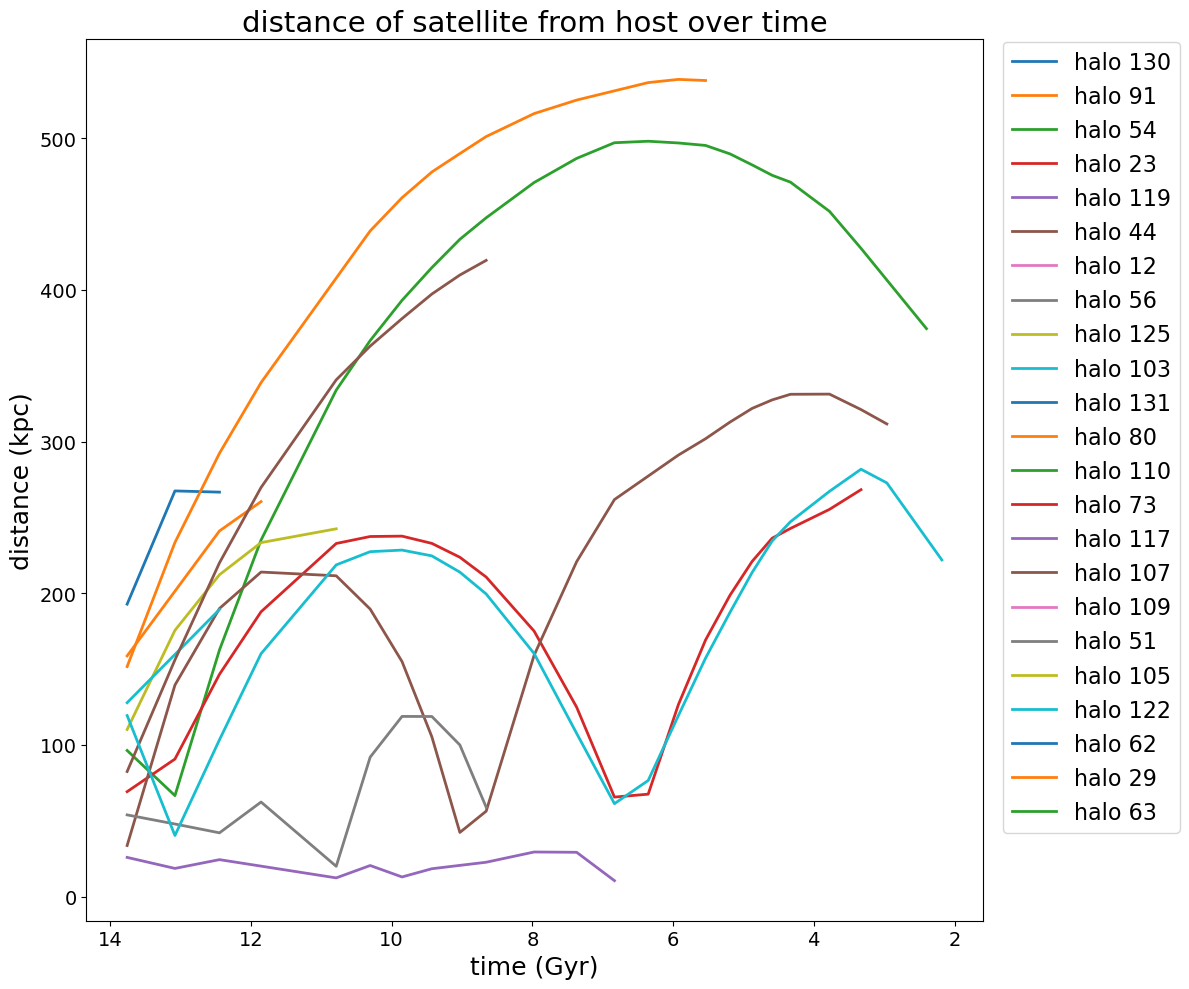

In [48]:
fig, ax = plt.subplots(figsize=(12,10))

i = 0
while i < np.size(sats):
    
    # this finds the index of each of the satellite halos
    
    idx = sats[i].halo_number
    
    # this finds the index of the host for each of the satellite halos. the index should be
    # the same for all haloes, but this is coded separately to account for the case where
    # the host halo changes index as its mass profile evolves.
    
    host = sats[i].calculate('Hosts()')
    host_idx = host[0].halo_number
    
    # this uses pre-coded tangos stuff to get M_vir and distance measurements at all available redshifts
    
    host_mvir, host_x, host_y, host_z, host_t = sim[30][host_idx].calculate_for_progenitors('Mvir', 'X', 'Y', 'Z', 't()')
    sat_mvir, sat_x, sat_y, sat_z, sat_t = sim[30][idx].calculate_for_progenitors('Mvir', 'X', 'Y', 'Z', 't()')
    
    # now, we have to correct for the distance of the satellite halos from the host halo, which itself
    # is also moving. to do this, we need to subtract the position of the satellite by the position of
    # the host. 
    # because the host halo and satellite halos might not be observed at the exact same amount of redshifts,
    # we first need to exclude the non-overlapping redshifts so that it's easier to subtract
    
    ### this checks for non-overlapping redshifts between host and satellite. 
    ### if non-overlapping, then array element set to 0
    for j in range(np.size(host_t)):
        if host_t[j] not in sat_t: 
            host_t[j] = 0.
            host_x[j] = 0.
            host_y[j] = 0.
            host_z[j] = 0.
    
    ### this checks for non-overlapping redshifts between satellite and host. 
    ### if non-overlapping, then array element set to 0
    for k in range(np.size(sat_t)):
        if sat_t[k] not in host_t:
            sat_t[k] = 0.
            sat_x[k] = 0.
            sat_y[k] = 0.
            sat_z[k] = 0.
            
    ### this removes all the zeros
    host_t = host_t[host_t != 0.]
    host_x = host_x[host_x != 0.]
    host_y = host_y[host_y != 0.]
    host_z = host_z[host_z != 0.]
    sat_t = sat_t[sat_t != 0.]
    sat_x = sat_x[sat_x != 0.]
    sat_y = sat_y[sat_y != 0.]
    sat_z = sat_z[sat_z != 0.]
    
    # here comes the actual subtracting correction
    sat_x = sat_x - host_x
    sat_y = sat_y - host_y
    sat_z = sat_z - host_z
    sat_r = np.sqrt(sat_x**2 + sat_y**2 + sat_z**2)
    
    # this plots distance vs. time for each halo with regard to their host halo
    plt.plot(sat_t, (sat_r * 1000), linewidth=2, label='halo ' + str(idx))
    i += 1
    
ax.invert_xaxis()
plt.legend(bbox_to_anchor=[1.01, 1.01], prop={'size': 16})
plt.title('distance of satellite from host over time', fontsize=21)
plt.xlabel('time (Gyr)', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('distance (kpc)', fontsize=18)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.style.use('default')
plt.savefig('satellite_over_time.png')

In [8]:
sats[1].calculate('Hosts()')

array([<Halo 'Tempest.9f11c.RD/RD0042/RD0042/halo_1' | NDM=281333 Nstar=0 Ngas=0>],
      dtype=object)